In [6]:
%matplotlib notebook
import numpy as np
from astropy.table import Table
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

import aplpy

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import PercentileInterval, AsinhStretch
from reproject import reproject_interp

from PSimagedownload import *
from test_convolution import *

from astropy.nddata import Cutout2D
from scipy.ndimage import  rotate

import aplpy

from astropy.visualization import (SqrtStretch, ImageNormalize)

In [2]:
from matplotlib import rc
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

<IPython.core.display.Javascript object>


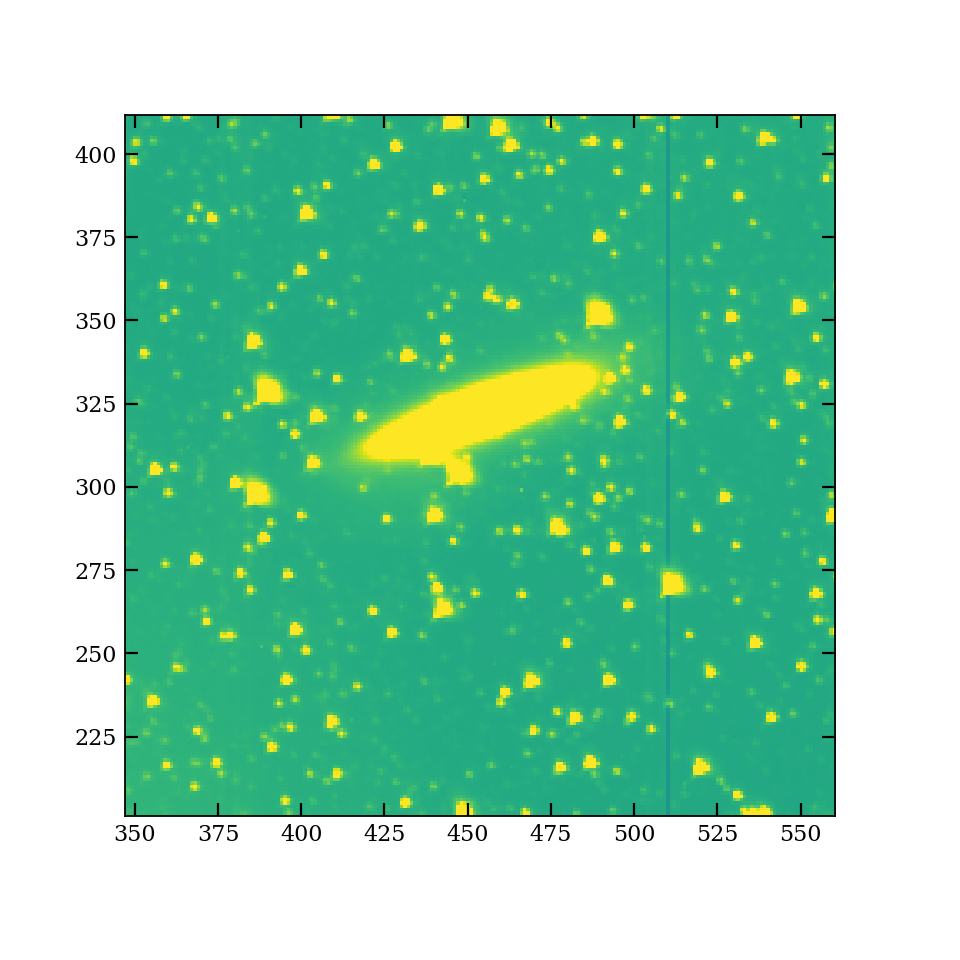

In [20]:
hdu = fits.open('./data/sculptor/tess2018280055940-s0003-1-1-0123-s_ffic.fits')
data = hdu[1].data

plt.figure()
plt.imshow(data,origin='lower',vmax = 200)

In [10]:
wcs = WCS(hdu[1].header)

In [19]:
wcs.all_world2pix(11.888002, -25.288220,1)

[array(454.67942669), array(323.63945079)]

## Sculptor NGC 253

In [21]:
x, y = wcs.all_world2pix(11.888002, -25.288220,1)

<IPython.core.display.Javascript object>


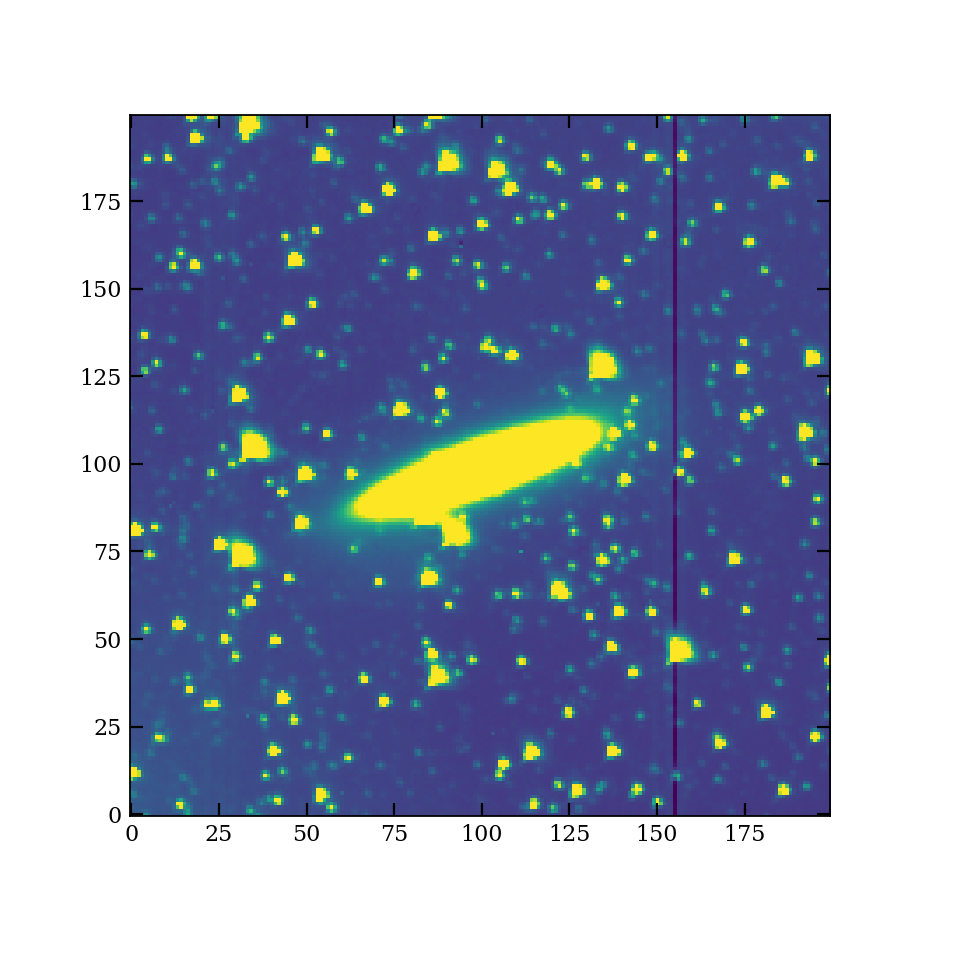

In [22]:
cutout = Cutout2D(data,(x,y),(200,200))
plt.figure()
plt.imshow(cutout.data,origin='lower',vmax = 200)

In [23]:
hdu = fits.PrimaryHDU(cutout.data)

hdu.writeto('./data/sculptor/sculptor_region.fits',overwrite=True)

In [25]:
wcs = WCS('./data/sculptor/sculptor_wcs.fits')
hdu = fits.open('./data/sculptor/sculptor_astrom.fits')
astron_ps = Rewrite_header_wcs(hdu,wcs)
fits.writeto('./data/sculptor/sculptor_corrected.fits',astron_ps[0].data,astron_ps[0].header)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


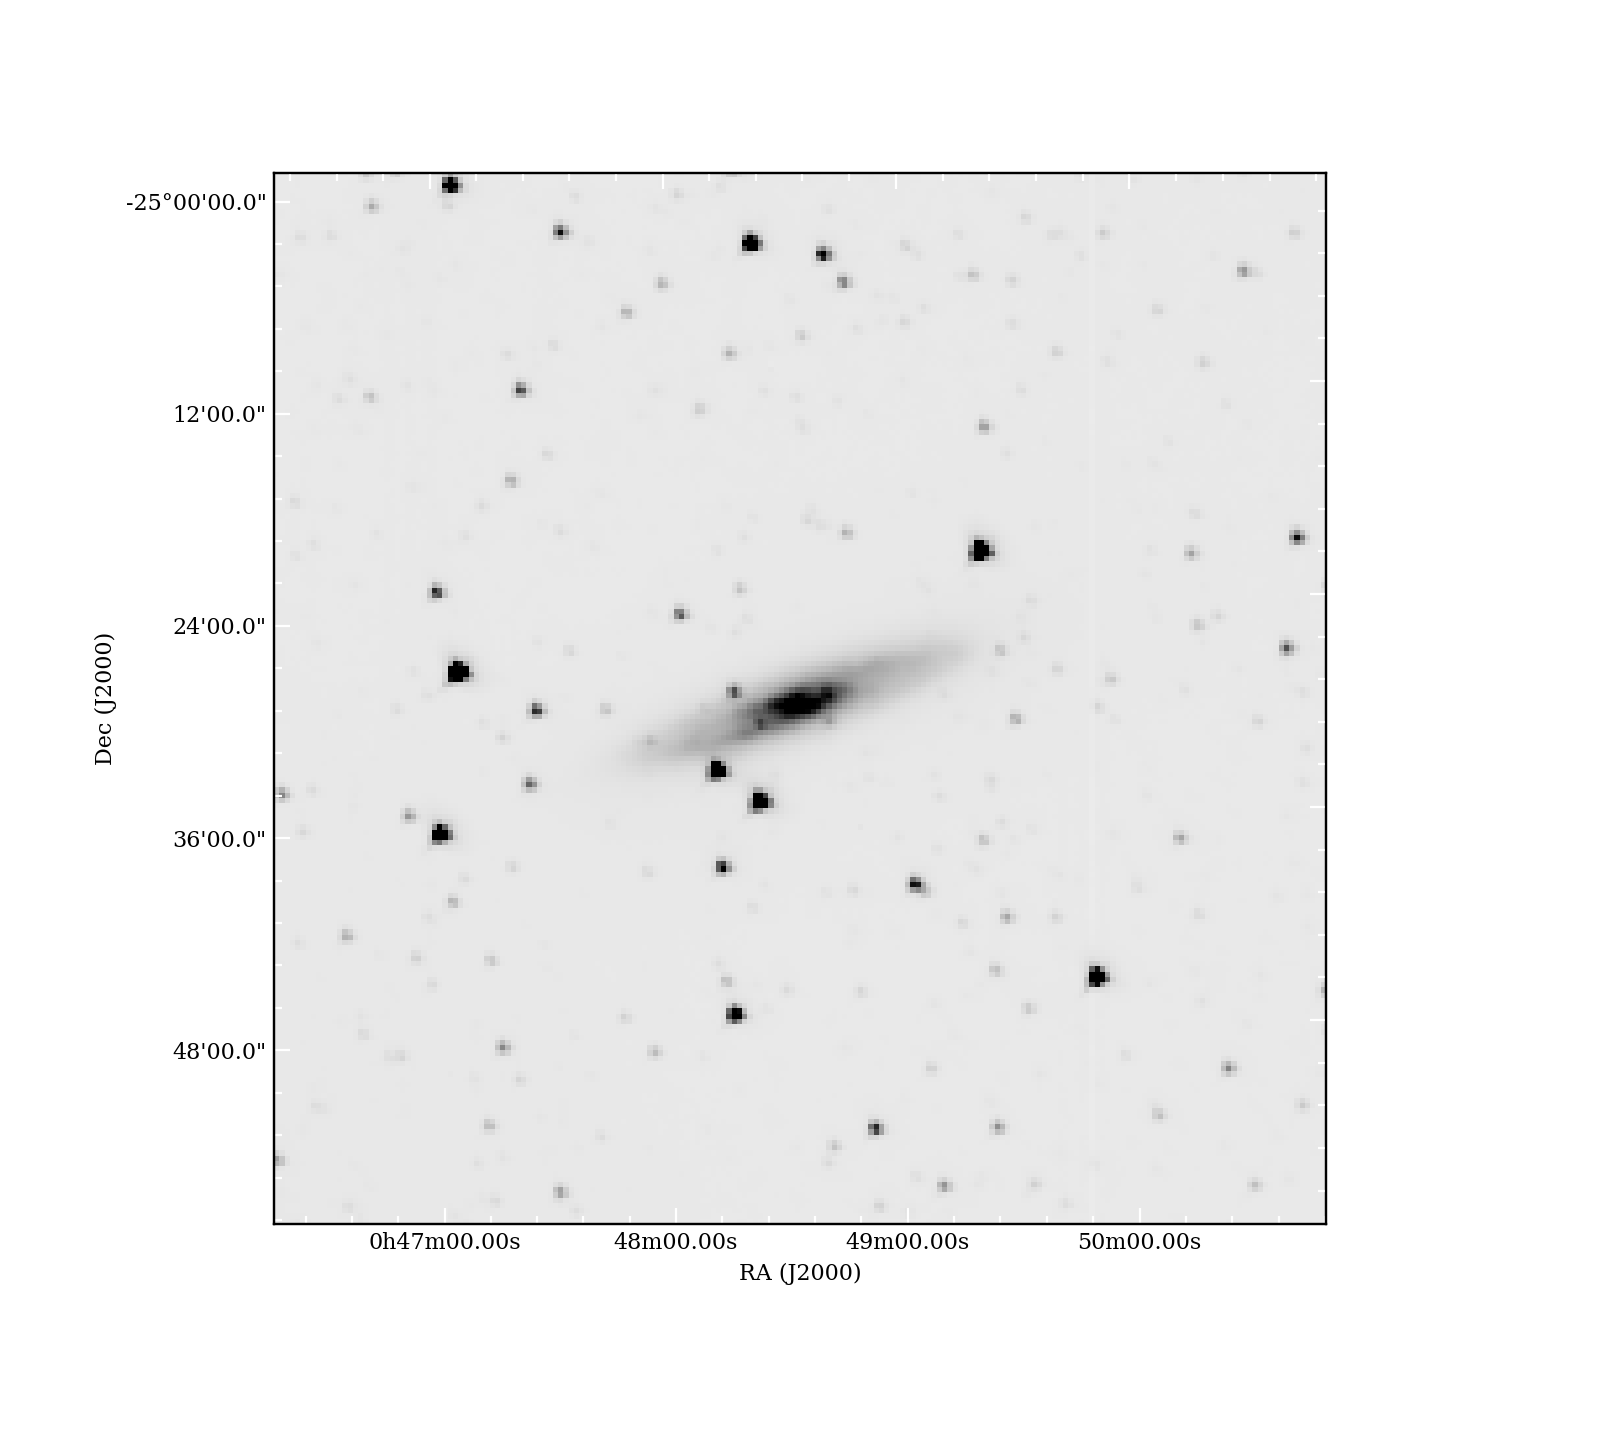

INFO: Auto-setting vmin to -1.407e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.540e+03 [aplpy.core]


In [32]:
fig = aplpy.FITSFigure('./data/sculptor/sculptor_corrected.fits')
fig.show_colorscale(cmap = 'gray_r')

In [36]:
kernal = Interp_PRF(x,y,1,1)
#Print_snapshot()
#ra, dec = tess_wcs.all_pix2world(x,y,1)
size = 1700
fitsurl = geturl(11.888002, -25.288220, size=size, filters="i", format="fits")
if len(fitsurl) > 0:
    fh = fits.open(fitsurl[0])
    ps = fh[0].data
    ps = PS_nonan(ps)
    try:
        #Print_snapshot()
        test = signal.fftconvolve(ps, kernal,mode='same')

        down = Downsample(test)
        np.save('test_PS_TESS.npy',test)
    except MemoryError:
        raise MemoryError("The convolution is too large, try a smaller array.")

/Users/ryanr/anaconda3/lib/python3.5/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


<IPython.core.display.Javascript object>


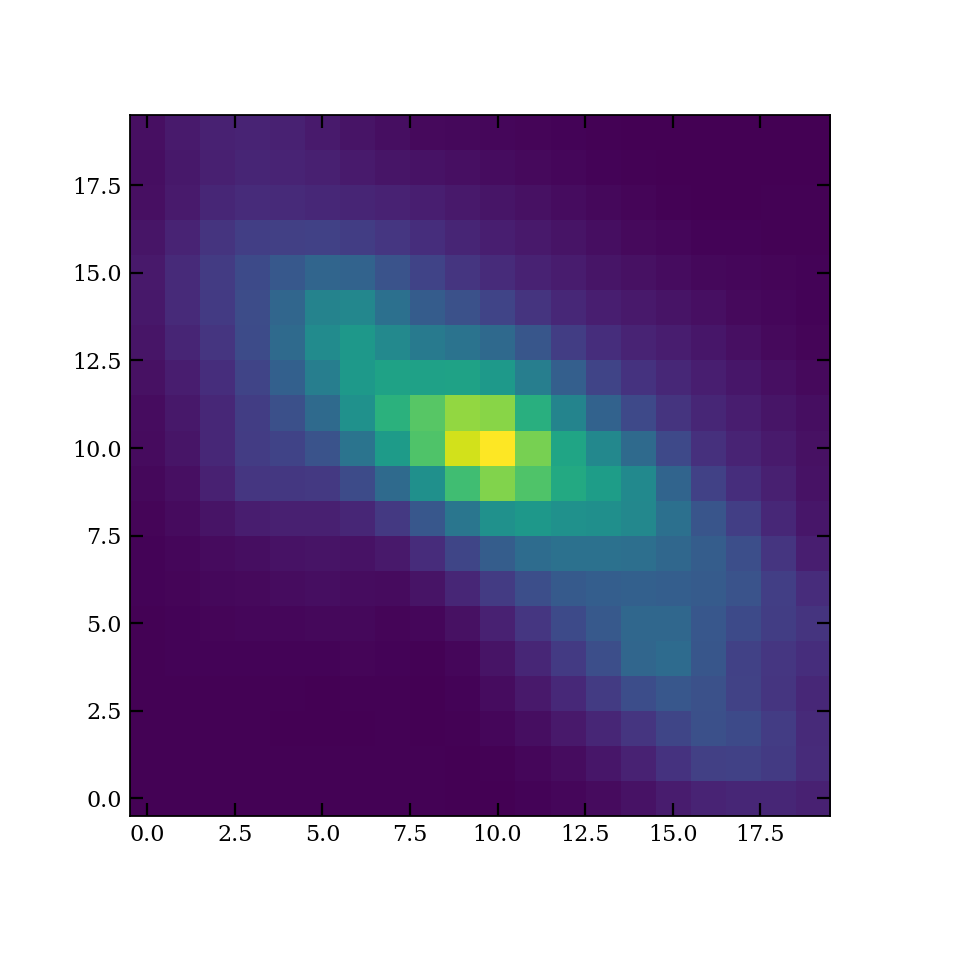

In [61]:
plt.figure()
plt.imshow(down,origin='lower')

In [65]:
tess_hdu = fits.open('./data/sculptor/sculptor_corrected.fits')
data = tess_hdu[0].data
tess_wcs = WCS(tess_hdu[0].header)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


In [ ]:
np.roll()

In [51]:
x, y =tess_wcs.all_world2pix(11.888002, -25.288220,1)

<IPython.core.display.Javascript object>


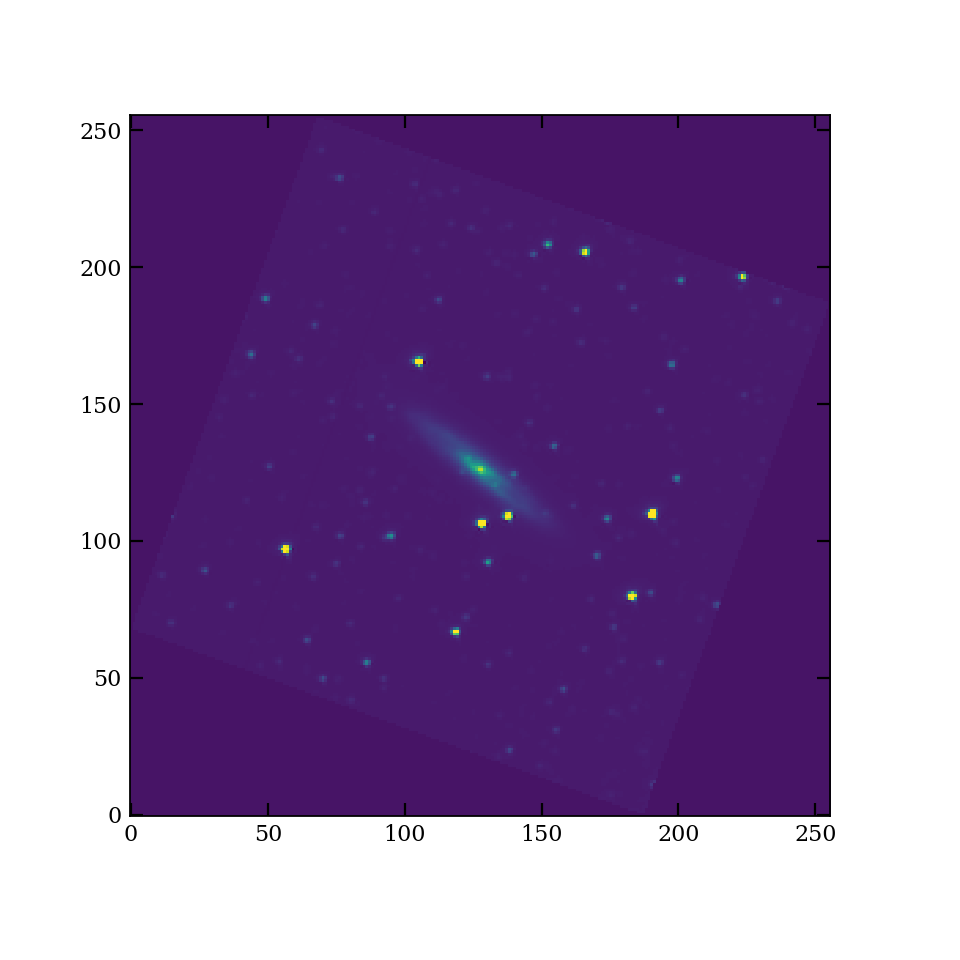

In [78]:
plt.figure()
plt.imshow(rotate(np.fliplr(data),20),origin='lower',vmax=5000)

In [3]:
kernal = Interp_PRF(454.67942669,323.63945079,1,1)
#Print_snapshot()
#ra, dec = tess_wcs.all_pix2world(x,y,1)
size = 1700
fitsurl = geturl(11.888002, -25.288220, size=size, filters="i", format="fits")
if len(fitsurl) > 0:
    fh = fits.open(fitsurl[0])
    ps = fh[0].data
    ps = PS_nonan(ps)
    try:
        #Print_snapshot()
        test = signal.fftconvolve(ps, kernal,mode='same')

        down = Downsample(test)
        np.save('test_PS_TESS.npy',test)
    except MemoryError:
        raise MemoryError("The convolution is too large, try a smaller array.")

/Users/ryanr/anaconda3/lib/python3.5/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


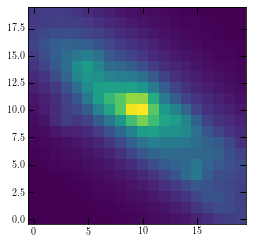

In [4]:
tess_hdu = fits.open('./data/sculptor/sculptor_corrected.fits')
data = tess_hdu[0].data
tess_wcs = WCS(tess_hdu[0].header)

x = 128
y = 126
cutout = Cutout2D(rotate(np.fliplr(data),20),(x,y),(20,20))
plt.figure()
plt.imshow(cutout.data,origin='lower')

<IPython.core.display.Javascript object>


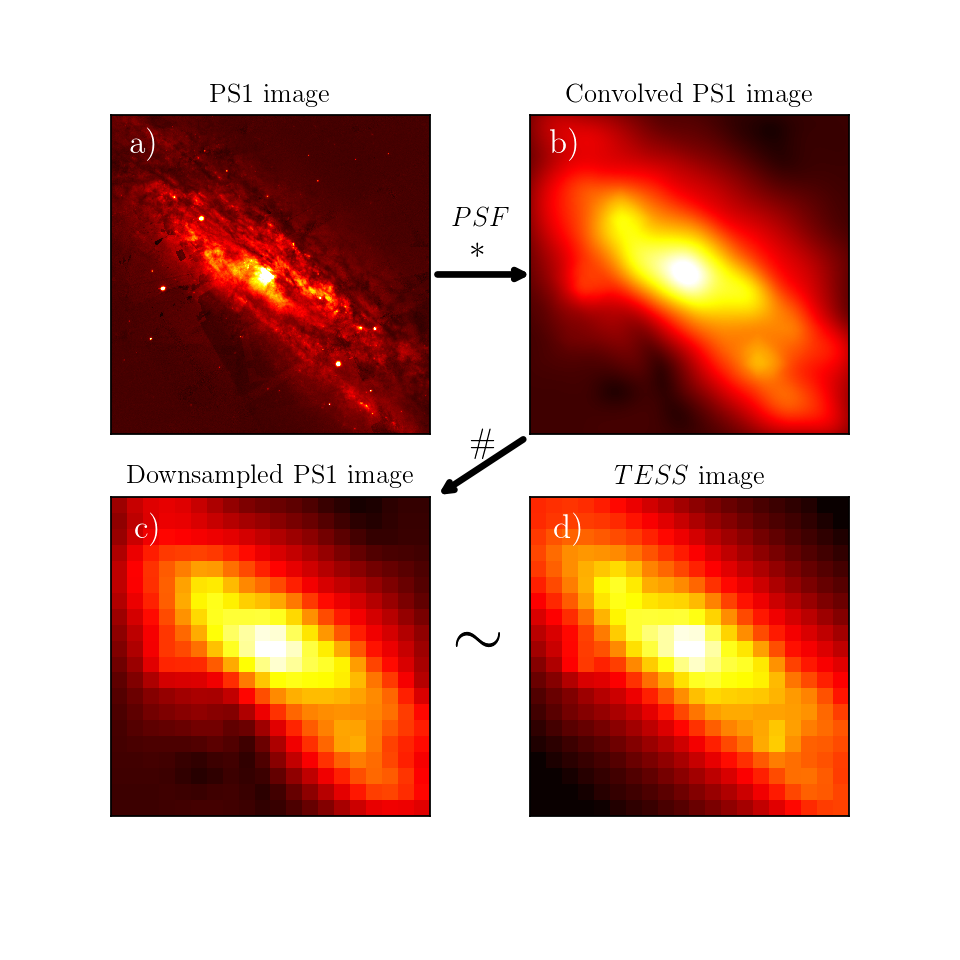

/Users/ryanr/anaconda3/lib/python3.5/site-packages/astropy/visualization/stretch.py:112: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/ryanr/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [23]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.title('PS1 image')
norm = ImageNormalize(vmin=np.nanmin(ps)+0.01*np.nanmin(ps), 
                      vmax=np.nanmax(ps)-0.98*np.nanmax(ps))
plt.imshow(ps,origin='lower',norm=norm,cmap='hot')
plt.text(100,1500,'a)',fontsize=15,color='w')
plt.gca().set_xticklabels(['']*10)
plt.gca().set_yticklabels(['']*10)
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

# annotations
plt.annotate('', xy=(1.33, .5), xycoords='axes fraction', xytext=(1.01, .5), 
             arrowprops=dict(arrowstyle="->", color='k',lw=3))

plt.annotate(r'$*$', xy=(1.1, .55), xycoords='axes fraction', xytext=(1.13, .55),fontsize=15)
plt.annotate(r'$PSF$', xy=(1.1, .55), xycoords='axes fraction', xytext=(1.07, .65),fontsize=12)


            
plt.subplot(2,2,2)
plt.title('Convolved PS1 image')
norm = ImageNormalize(vmin=np.nanmin(test)+0.1*np.nanmin(test), 
                      vmax=np.nanmax(test)-0.1*np.nanmax(test), stretch=SqrtStretch())
plt.imshow(test,origin='lower',norm=norm,cmap='hot')
plt.text(100,1500,'b)',fontsize=15,color='w')
plt.gca().set_xticklabels(['']*10)
plt.gca().set_yticklabels(['']*10)
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

# annotations
plt.annotate('', xy=(-0.3, -0.2), xycoords='axes fraction', xytext=(-0.01, -0.01), 
             arrowprops=dict(arrowstyle="->", color='k',lw=3))
plt.annotate(r'\#', xy=(-0.2, -0.2), xycoords='axes fraction', xytext=(-0.19, -0.06),fontsize=15)

plt.subplot(2,2,3)
plt.title('Downsampled PS1 image')
norm = ImageNormalize(vmin=np.nanmin(down)+0.1*np.nanmin(down), 
                      vmax=np.nanmax(down)-0.1*np.nanmax(down), stretch=SqrtStretch())
plt.imshow(down,origin='lower',norm=norm,cmap='hot')
plt.text(1,17,'c)',fontsize=15,color='w')
plt.gca().set_xticklabels(['']*10)
plt.gca().set_yticklabels(['']*10)
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

plt.annotate(r'$\sim$', xy=(1.05, .5), xycoords='axes fraction', xytext=(1.08, .5),fontsize=30)

tess_image = cutout.data
plt.subplot(2,2,4)
plt.title('$TESS$ image')
norm = ImageNormalize(vmin=np.nanmin(tess_image)+0.1*np.nanmin(tess_image), 
                      vmax=np.nanmax(tess_image)-0.1*np.nanmax(tess_image), stretch=SqrtStretch())
plt.imshow(tess_image,origin='lower',norm=norm,cmap='hot')
plt.text(1,17,'d)',fontsize=15,color='w')
plt.gca().set_xticklabels(['']*10)
plt.gca().set_yticklabels(['']*10)
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('PS_TESS_comp.pdf')



<IPython.core.display.Javascript object>


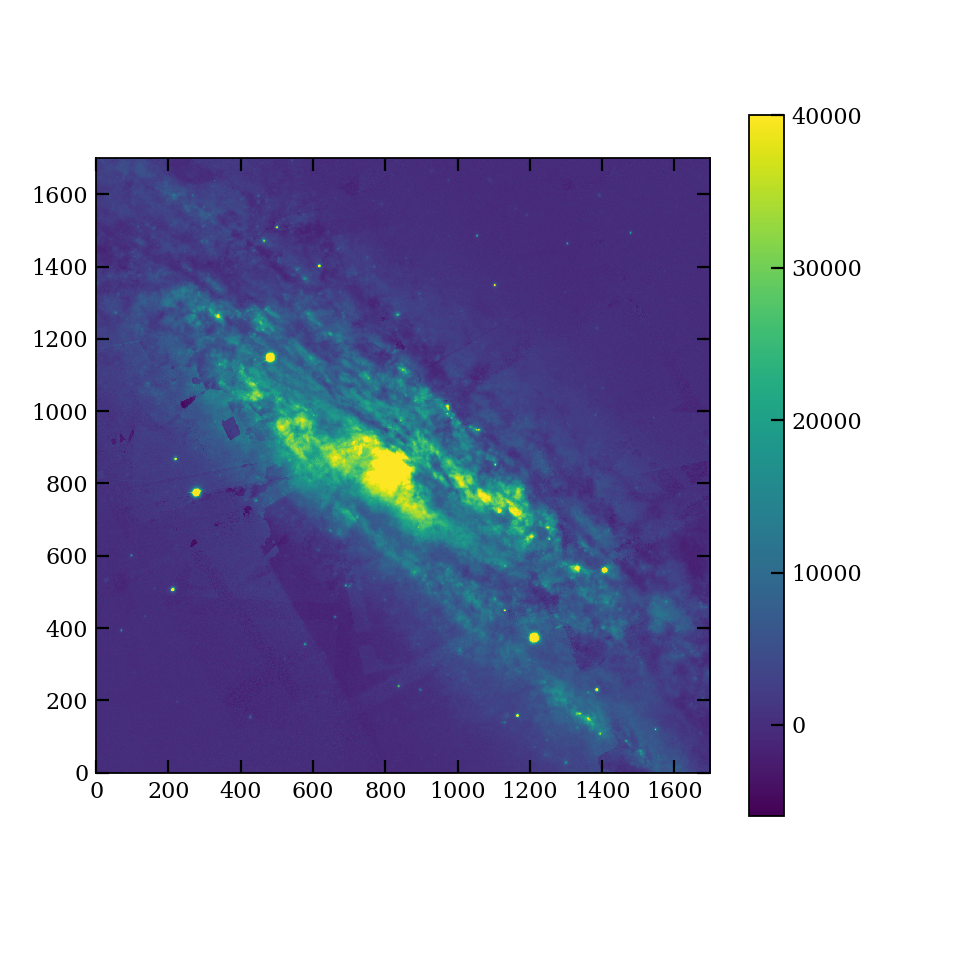

In [47]:
plt.figure()
plt.imshow(ps,origin='lower',vmax=40000)
plt.colorbar()

## NGC 0247

In [15]:
x, y = wcs.all_world2pix(11.785625, -20.760389,1)

<IPython.core.display.Javascript object>


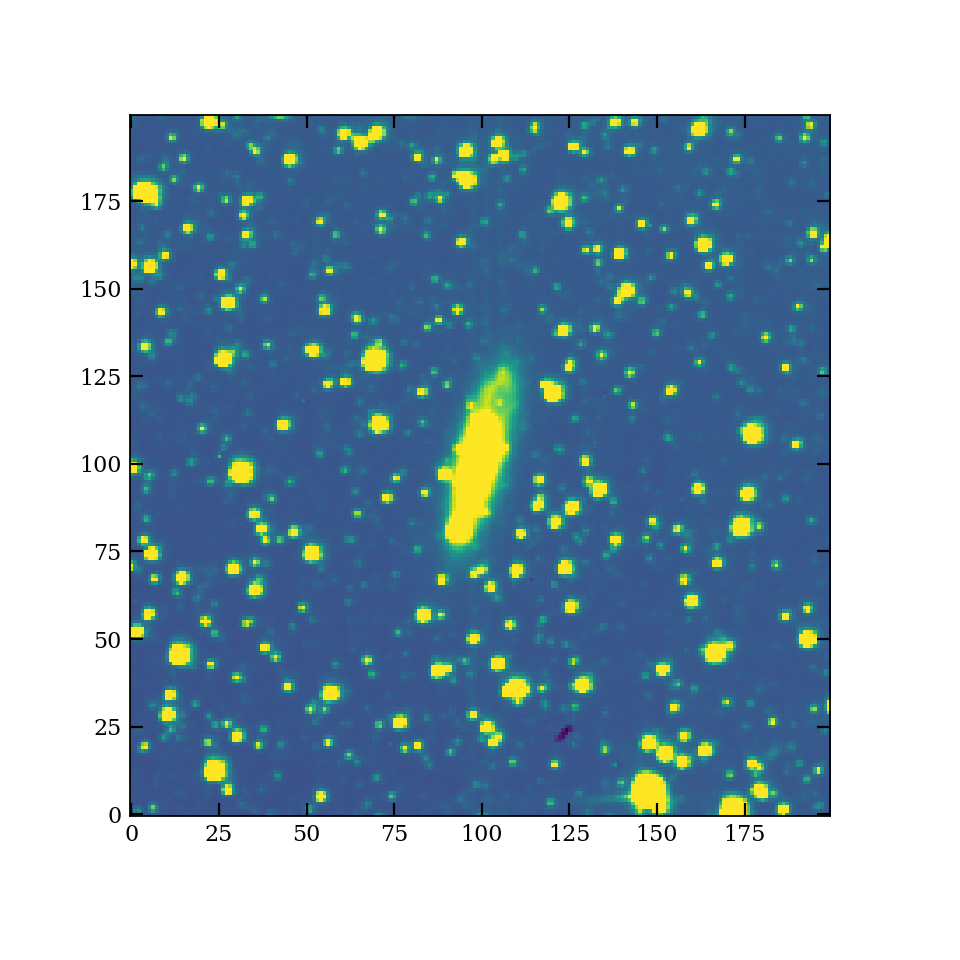

In [17]:
cutout = Cutout2D(data,(x,y),(200,200))
plt.figure()
plt.imshow(cutout.data,origin='lower',vmax = 200)

In [18]:
hdu = fits.PrimaryHDU(cutout.data)

hdu.writeto('./data/sculptor/ngc247_region.fits',overwrite=True)